In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
data_pred = glob.glob('*.csv')

In [3]:
df_list = []
for element in data_pred:
    df = pd.read_csv(element)
    df_list.append(df)

In [4]:
df = pd.concat(df_list,ignore_index=True)

### Exploratory Data Analysis

In [5]:
df.head()

,filename,class,size_asm,size_bytes,E8,B9,68,B0,83,B8,...,pop,cmp,jz,lea,test,jmp,add,jnz,retn,xor
0,01azqd4InC7m9JpocGv5,9,58961309,5256192,4710,3502,3730,2831,4862,3388,...,542,684,557,308,674,733,625,134,290,418
1,01jsnpXSAlgw6aPeDxrU,9,8921059,4825600,22304,2658,2748,2615,9353,2324,...,70,127,44,225,73,1,35,16,27,199
2,01kcPWA9K2BOxQeS5Rju,1,81988,712704,2899,487,1129,460,1059,589,...,19,15,13,39,14,12,14,11,16,18
3,01SuzwMJEIXsK7A8dQbl,8,1045140,460288,546,296,385,268,655,359,...,50,185,78,19,6,72,430,66,33,19
4,02IOCvYEy8mjiuAQHax3,6,3457122,831488,343,286,303,339,308,315,...,13,8,2,0,1,39,15,1,0,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Columns: 274 entries, filename to xor
dtypes: int64(273), object(1)
memory usage: 578.0+ KB


Terdapat 270 rows, dan 274 columns

In [7]:
df.describe()

,class,size_asm,size_bytes,E8,B9,68,B0,83,B8,00,...,pop,cmp,jz,lea,test,jmp,add,jnz,retn,xor
count,270.000000,2.700000e+02,2.700000e+02,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,5.000000,1.057689e+07,3.640677e+06,3303.785185,1051.077778,2124.892593,1168.266667,2774.374074,1168.588889,52725.222222,...,591.407407,473.759259,358.303704,443.162963,335.425926,310.959259,493.648148,248.088889,257.255556,386.329630
std,2.586784,1.787944e+07,3.148768e+06,5094.054401,1279.650442,2736.931580,1817.224387,3859.833973,1357.971787,100425.621413,...,2432.004285,1756.829545,1658.309565,1764.990707,1744.327186,1049.145541,1758.632328,1034.495362,1021.856622,2054.821484
min,1.000000,8.198800e+04,2.227200e+05,16.000000,5.000000,12.000000,2.000000,3.000000,3.000000,426.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.657672e+05,7.275520e+05,517.000000,255.000000,453.500000,259.250000,565.000000,326.250000,8512.250000,...,78.500000,12.500000,5.000000,18.000000,6.000000,1.000000,77.250000,8.000000,24.000000,13.250000
50%,5.000000,4.249588e+06,2.331136e+06,1123.000000,521.500000,1057.500000,585.500000,1109.500000,630.500000,19787.500000,...,140.000000,102.500000,29.000000,68.500000,20.500000,51.500000,180.500000,27.500000,46.000000,60.000000
75%,7.000000,1.060371e+07,5.397248e+06,3321.750000,1115.500000,3007.750000,1347.250000,3279.000000,1335.000000,49532.750000,...,275.750000,231.250000,120.750000,206.500000,111.500000,214.000000,372.750000,79.500000,146.000000,165.750000
max,9.000000,9.608545e+07,1.132902e+07,29162.000000,6293.000000,16462.000000,22332.000000,23914.000000,6375.000000,702234.000000,...,31566.000000,17007.000000,21087.000000,21813.000000,24954.000000,11460.000000,18404.000000,10808.000000,12627.000000,30163.000000


In [8]:
group_by_class = df.groupby('class').mean()

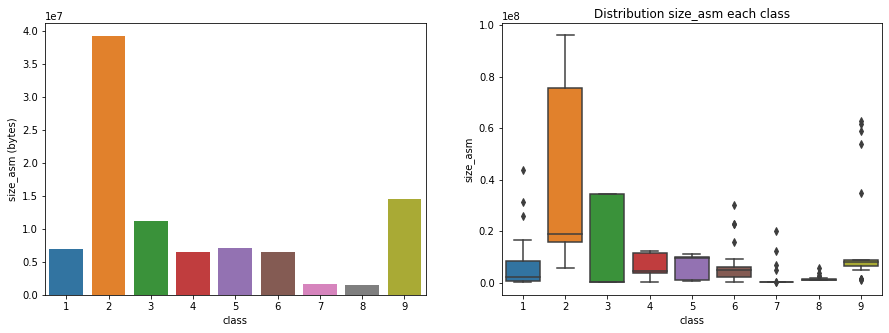

In [9]:
# Besar rata-rata file asm untuk masing-masing class malware
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data_to_plot = group_by_class['size_asm']
sns.barplot(x=data_to_plot.index, y=data_to_plot.values)
plt.ylabel('size_asm (bytes)')
plt.subplot(1,2,2)
sns.boxplot(y=df['size_asm'], x=df['class'])
plt.title('Distribution size_asm each class')
plt.show()

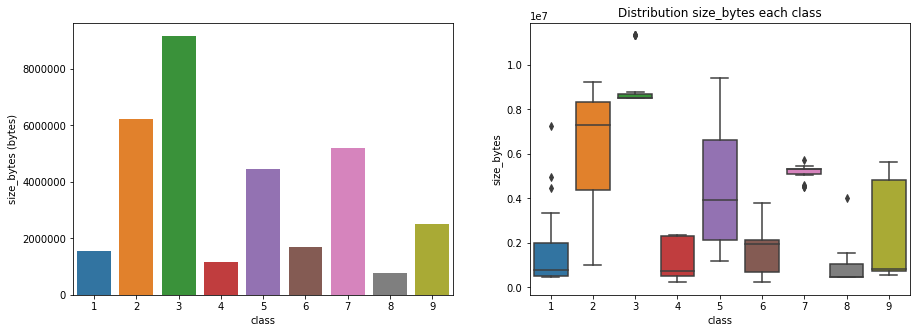

In [10]:
# Besar rata-rata file asm untuk masing-masing class malware
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data_to_plot = group_by_class['size_bytes']
sns.barplot(x=data_to_plot.index, y=data_to_plot.values)
plt.ylabel('size_bytes (bytes)')
plt.subplot(1,2,2)
sns.boxplot(y=df['size_bytes'], x=df['class'])
plt.title('Distribution size_bytes each class')
plt.show()

In [11]:
# Analisis jumlah rata-rata common_opcode tiap class malware
common_opcode = ['mov', 'push', 'call', 'pop', 'cmp', 'jz', 'lea', 'test', 'jmp', 'add', 'jnz', 'retn', 'xor'] 

In [12]:
group_by_class[common_opcode]

,mov,push,call,pop,cmp,jz,lea,test,jmp,add,jnz,retn,xor
class,,,,,,,,,,,,,
1,22535.033333,9959.466667,5501.466667,3595.666667,2992.166667,2539.300000,2987.566667,2409.966667,1780.100000,2706.933333,1768.066667,1592.233333,1644.733333
2,9895.466667,1089.500000,572.433333,549.533333,347.800000,177.700000,293.533333,192.300000,178.100000,350.733333,138.666667,198.300000,1225.866667
3,176.600000,401.766667,229.033333,175.433333,15.666667,7.833333,42.066667,7.966667,10.400000,135.300000,12.200000,66.333333,21.433333
4,192.466667,271.200000,65.266667,116.966667,37.133333,10.433333,27.100000,16.366667,154.366667,148.500000,11.233333,8.366667,78.300000
5,774.500000,503.600000,259.133333,139.700000,58.366667,33.600000,89.233333,25.400000,28.700000,206.700000,34.066667,32.133333,61.400000
6,1157.466667,1047.633333,523.333333,292.766667,213.266667,157.400000,253.033333,154.333333,243.933333,243.666667,100.166667,196.333333,150.533333
7,137.333333,263.000000,154.800000,87.700000,29.800000,22.566667,19.533333,9.933333,33.333333,7.700000,26.333333,66.833333,12.066667
8,1933.966667,401.233333,231.933333,58.866667,183.866667,80.900000,34.966667,20.833333,72.566667,313.533333,67.033333,30.466667,36.033333
9,1639.533333,1381.866667,642.033333,306.033333,385.766667,195.000000,241.433333,181.733333,297.133333,329.766667,75.033333,124.300000,246.600000


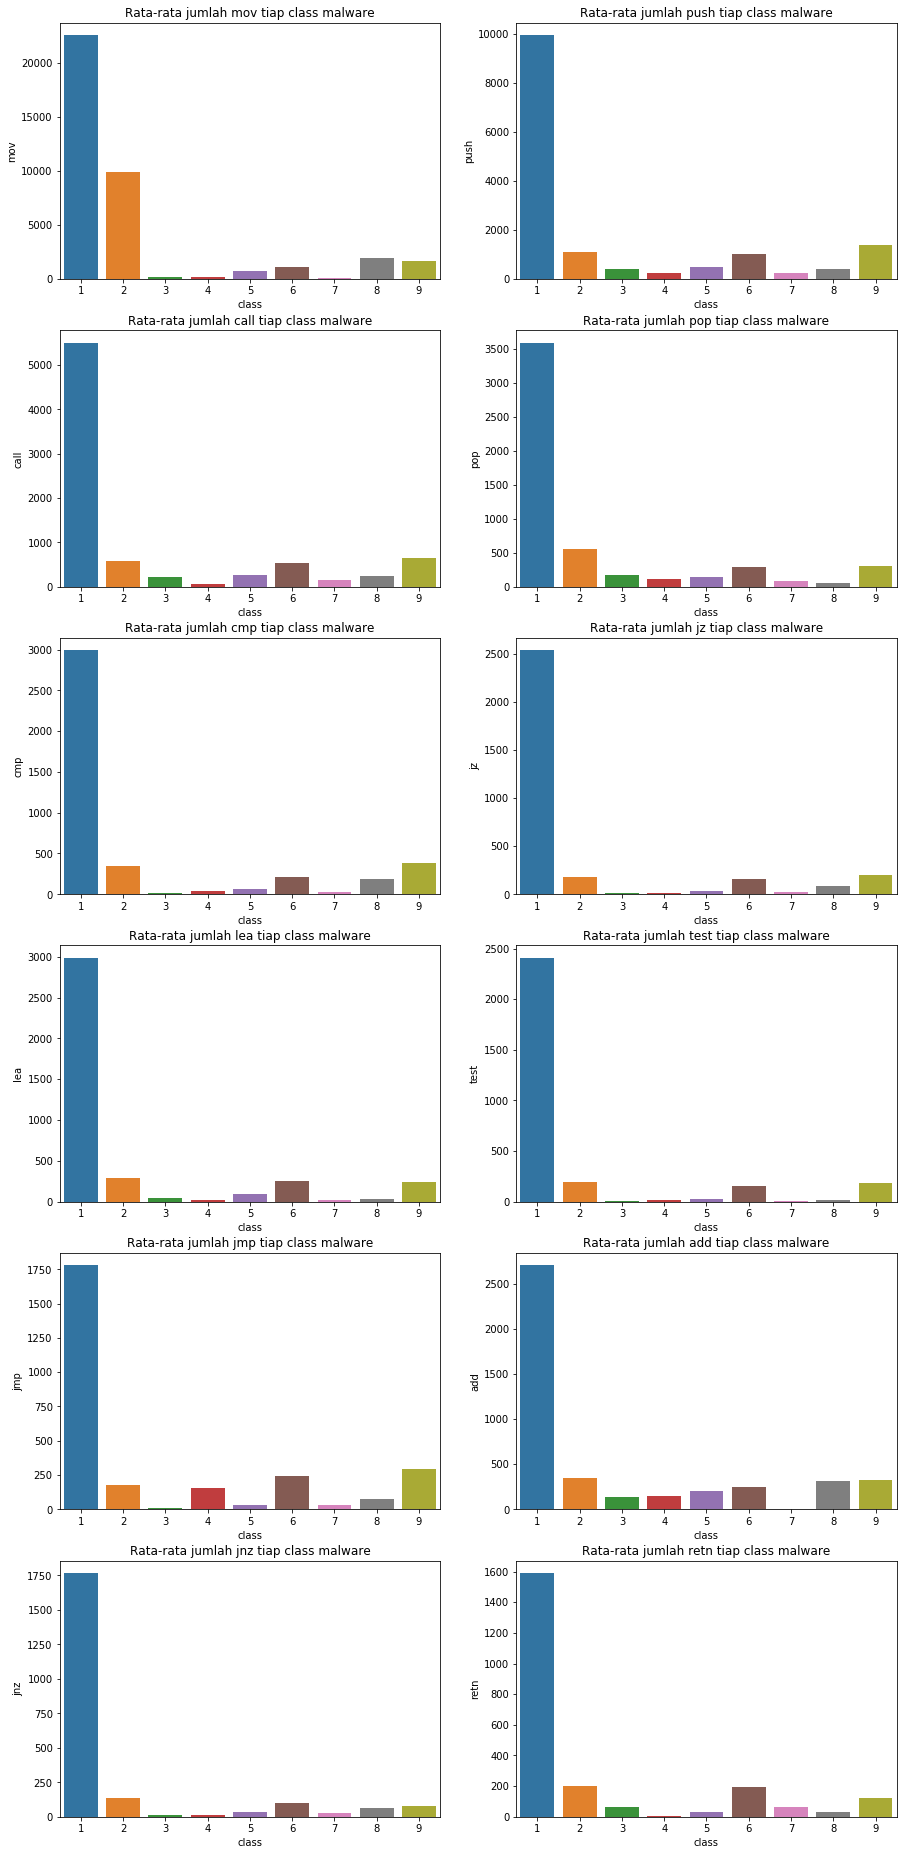

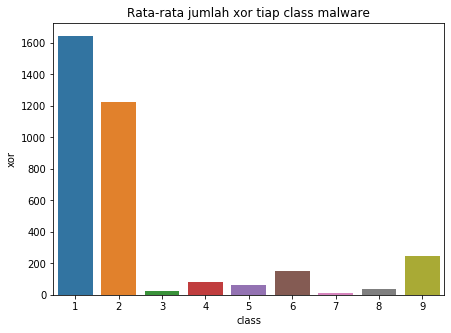

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(15,33))
i = 1
for element in common_opcode[:-1]:
    data_to_plot = group_by_class[element]
    plt.subplot(6,2,i)
    sns.barplot(x=data_to_plot.index, y=data_to_plot.values)
    plt.ylabel(element)
    plt.title(f'Rata-rata jumlah {element} tiap class malware')
    i += 1
plt.show()
plt.figure(figsize=(7,5))
plt.subplot(1,1,1)
data_to_plot = group_by_class[common_opcode[-1]]
sns.barplot(x=data_to_plot.index, y=data_to_plot.values)
plt.ylabel(common_opcode[-1])
plt.title(f'Rata-rata jumlah {common_opcode[-1]} tiap class malware')
plt.show()
plt.tight_layout()

### Prediction

In [14]:
# Persiapan feature dan target
feature = df.loc[:, 'size_asm':'xor'].values
target = df['class']

In [15]:
# Feature Extraction menggunakan PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [16]:
scaler = StandardScaler()
model = PCA()
pipeline = make_pipeline(scaler, model)

In [17]:
pipeline.fit(feature)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

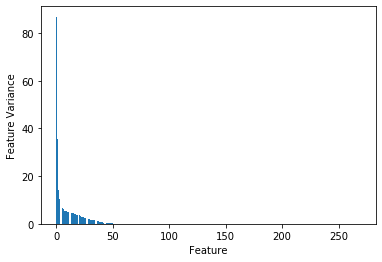

In [18]:
#Melihat feature dengan feature variance
features = range(model.n_components_)
plt.bar(features, model.explained_variance_)
plt.xlabel('Feature')
plt.ylabel('Feature Variance')
plt.show()

Komponen yang memiliki variance yang cukup terlihat berada di rentang 1-50

### Jumlah Komponen yang akan digunakan dalam PCA

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [20]:
# Scaling Feature
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(feature)

In [28]:
ls_acc_cv = []
for i in range(1,50,2):
    model = PCA(n_components=i)
    model.fit(scaled_samples)
    X = model.transform(scaled_samples)
    rf = RandomForestClassifier(n_estimators=100)
    #Cross Validation
    train_pred = cross_val_predict(rf, X, target, cv = 10, n_jobs = -1)
    #Cross Validation Accuracy Metrics
    acc_cv = round(accuracy_score(target, train_pred)*100, 2)
    ls_acc_cv.append(acc_cv)

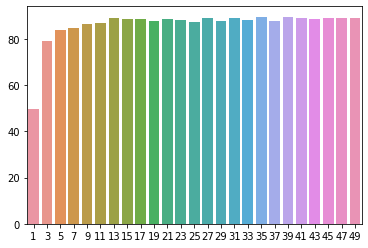

In [29]:
sns.barplot(list(range(1,50,2)), ls_acc_cv)

kita akan menggunakan jumlah feature = 45

In [23]:
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(feature)

In [24]:
pca = PCA(n_components=45)

In [25]:
pca.fit(scaled_feature)

PCA(copy=True, iterated_power='auto', n_components=45, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca_features = pd.DataFrame(pca.transform(scaled_feature))

In [27]:
df_pca_feat= pd.concat([df[['filename', 'class']], pca_features], axis=1)

### RandomForest Model

In [43]:
X = df_pca_feat.iloc[:, 2:].values
y = df_pca_feat['class']

In [31]:
from sklearn.model_selection import GridSearchCV

In [75]:
rf = RandomForestClassifier()

In [80]:
#Menentukan n_estimators terbaik untuk RandomForest
rf_cv = GridSearchCV(rf, param_grid= {'n_estimators':list(range(100,700,100))}, cv=5)
rf_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [81]:
print(f'best parameter= {rf_cv.best_params_}')
print(f'best score = {rf_cv.best_score_}')

best parameter n_estimator = {'n_estimators': 400}
best score = 0.9


Menggunakan GridSearchCV, ditemukan n_estimators max = 400

In [82]:
# Menentukan max_depth parameter
rf = RandomForestClassifier(n_estimators=400)

In [83]:
param_grid = {
    'max_depth': np.linspace(1,32,32),
}

In [84]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=400, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [85]:
print(f'best parameter= {rf_cv.best_params_}')
print(f'best score = {rf_cv.best_score_}')

best parameter n_estimator = {'max_depth': 20.0}
best score = 0.9


max_depth terbaik adalah 20

In [86]:
# Menentukan max_depth parameter
rf = RandomForestClassifier(n_estimators=400, max_depth=20)

In [94]:
param_grid = {
    'max_features': np.linspace(0.25,1,5)
}

In [95]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=400, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='war

In [98]:
print(f'best parameter= {rf_cv.best_params_}')
print(f'best score = {rf_cv.best_score_}')

best parameter n_estimator = {'max_features': 0.625}
best score = 0.9037037037037037


max_features yang terbaik adalah 0.625

### Predict Random Forest

In [161]:
model_random_forest = RandomForestClassifier(n_estimators=400, max_depth=20, max_features=0.625)

In [162]:
pred_rf = cross_val_predict(model_random_forest, X, y, cv=10, n_jobs=-1)

In [163]:
acc_rf = accuracy_score(y, pred_rf, normalize=True)

In [164]:
acc_rf

0.9111111111111111

### Confussion Matrix dan Classification Report Random Forest

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
confusion_matrix(y, pred)

array([[28,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  1, 26,  2,  0,  0,  0],
       [ 2,  0,  0,  2,  2, 23,  0,  0,  1],
       [ 0,  3,  0,  0,  0,  1, 26,  0,  0],
       [ 1,  0,  0,  1,  1,  1,  0, 26,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0, 27]], dtype=int64)

In [109]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.88      0.93      0.90        30
           2       0.85      0.97      0.91        30
           3       1.00      1.00      1.00        30
           4       0.83      0.97      0.89        30
           5       0.90      0.87      0.88        30
           6       0.85      0.77      0.81        30
           7       0.96      0.87      0.91        30
           8       1.00      0.87      0.93        30
           9       0.90      0.90      0.90        30

    accuracy                           0.90       270
   macro avg       0.91      0.90      0.90       270
weighted avg       0.91      0.90      0.90       270



### Support Vector Machine Classifier Model

In [110]:
from sklearn.svm import SVC

In [111]:
X = df_pca_feat.iloc[:, 2:].values
y = df_pca_feat['class']

In [122]:
svc = SVC(gamma='auto')

In [123]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly']
}

In [124]:
svc_cv = GridSearchCV(svc, param_grid, cv=5 )
svc_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [125]:
print(f'best parameter= {svc_cv.best_params_}')
print(f'best score = {svc_cv.best_score_}')

best parameter n_estimator = {'kernel': 'linear'}
best score = 0.8851851851851852


kernel terpilih adalah linear

In [129]:
#best C parameter
svc = SVC(gamma='auto', kernel='linear')

In [137]:
param_grid = {
    'C': np.linspace(0.1,1,10)
}

In [138]:
svc_cv = GridSearchCV(svc, param_grid, cv=5 )
svc_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [139]:
print(f'best parameter= {svc_cv.best_params_}')
print(f'best score = {svc_cv.best_score_}')

best parameter n_estimator = {'C': 0.8}
best score = 0.8925925925925926


C parameter yang memberikan score terbaik adalah 0.8

### Predict SVC

In [152]:
svc = SVC(gamma='auto', kernel='linear', C=0.8)

In [153]:
pred_svc = cross_val_predict(svc, X, y, cv=10, n_jobs=-1)

In [154]:
acc_svc = accuracy_score(y, pred, normalize=True)

In [159]:
acc_svc

0.8740740740740741

### Confussion Matrix dan Classification Report SVC

In [157]:
confusion_matrix(y, pred_svc)

array([[29,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 25,  3,  1,  0,  0],
       [ 2,  0,  0,  8,  2, 17,  0,  0,  1],
       [ 0,  1,  0,  0,  1,  0, 27,  0,  1],
       [ 1,  0,  0,  2,  1,  0,  0, 26,  0],
       [ 1,  0,  1,  1,  0,  2,  0,  1, 24]], dtype=int64)

In [158]:
print(classification_report(y, pred_svc))

              precision    recall  f1-score   support

           1       0.88      0.97      0.92        30
           2       0.97      0.93      0.95        30
           3       0.97      1.00      0.98        30
           4       0.71      1.00      0.83        30
           5       0.86      0.83      0.85        30
           6       0.77      0.57      0.65        30
           7       0.96      0.90      0.93        30
           8       0.90      0.87      0.88        30
           9       0.89      0.80      0.84        30

    accuracy                           0.87       270
   macro avg       0.88      0.87      0.87       270
weighted avg       0.88      0.87      0.87       270



In [166]:
pd.DataFrame({'model':['Random Forest', 'Support Vector Machine'], 'Accuracy CV(10 fold)':[acc_rf, acc_svc]})

,model,Accuracy CV(10 fold)
0,Random Forest,0.911111
1,Support Vector Machine,0.874074
